In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import time
from scipy import stats
!pip install kaleido
import kaleido 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 1.3 MB/s 


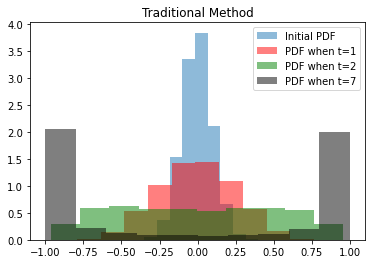

In [2]:
# for dynamical system dx/dt = 1-x^3
# the analytical solution is  x=xi*np.exp(t)*(1-xi^2+xi^2exp(2t))^(-0.5) where xi = initial location, x=current location

# generating 10000 data points with mean = 0 and std = 0.5
xi     = np.random.normal(0, 0.1, 10000)
plt.figure()
plt.hist(xi,density='True',label='Initial PDF',alpha=0.5) # plot pdf

t      = 1
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='red',density='True',label='PDF when t=1',alpha=0.5) # plot pdf

t      = 2
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='green',density='True',label='PDF when t=2',alpha=0.5) # plot pdf

t      = 4
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='black',density='True',label='PDF when t=7',alpha=0.5) # plot pdf

plt.title('Traditional Method')
plt.legend()
plt.show()



In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
def LE_method(x,rho,n_step,t_size):
    for count in range(n_step): # forward for 1 time steps
        xi   = x
        xint = 0
        for i in np.arange(0,t_size*1000,1):
            tp = i*t_size/(t_size*1000)
            x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
            c  = 1-3*x*x
            xint += c
        rho  = rho*np.exp(-xint*t_size/1000)
        #rho  = rho/np.trapz(rho,x)
    return x,rho
def PDF(x,mu,std):
    return stats.norm(mu, std).pdf(x)

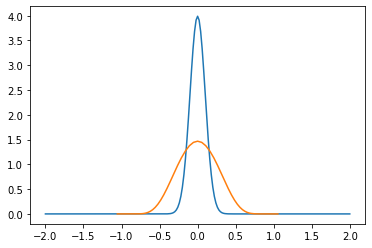

In [4]:
t      = 1
fig    = plt.figure()
xi     = np.arange(-2,2.02,0.02) 
x      = np.arange(-2,2.02,0.02)
x_ref  = np.arange(-2,2.02,0.02)
rho    = PDF(x,0,0.1)
plt.plot(x,rho)
x_plot,rho_plot = LE_method(x,rho,n_step=1,t_size=1)
plt.plot(x_plot,rho_plot)

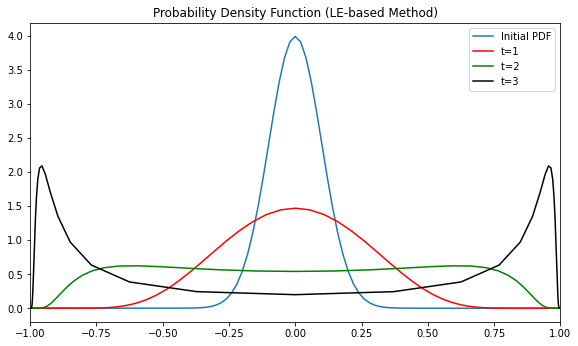

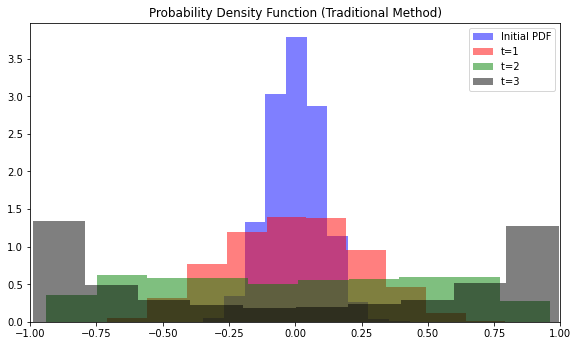

In [11]:
def PDF(x,mu,std):
    return stats.norm(mu, std).pdf(x)

import time

t      = 1
fig    = plt.figure()
xi     = np.arange(-2,2.02,0.02) 
x      = np.arange(-2,2.02,0.02)
x_ref  = np.arange(-2,2.02,0.02)
rho    = PDF(x,0,0.1)  # generate the initial pdf 
original_rho_int = np.sum(rho)
plt.plot(x_ref,rho/np.trapz(rho,x),label='Initial PDF')

for count in range(1): # forward for 1 time steps
    xi   = x
    xint = 0
    for i in np.arange(0,t*1000,1):
        tp = i*t/(t*1000)
        x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
        c  = 1-3*x*x
        xint += c
    rho  = rho*np.exp(-xint*t/1000)
    #rho  = rho/np.trapz(rho,x)
plt.plot(x,rho,'r',label='t=1')

for count in range(1): # forward for 2 time steps
    xi  = x
    xint = 0
    for i in np.arange(0,t*1000,1):
        tp = i*t/(t*1000)
        x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
        c  = 1-3*x*x
        xint += c
    rho  = rho*np.exp(-xint*t/1000)
    #rho  = rho/np.trapz(rho,x)
plt.plot(x,rho,'g',label='t=2 ')


for count in range(1): # forward for 7 time steps
    xi  = x
    xint = 0
    for i in np.arange(0,t*1000,1):
        tp = i*t/(t*1000)
        x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
        c  = 1-3*x*x
        xint += c
    rho  = rho*np.exp(-xint*t/1000)
    #rho  = rho/np.trapz(rho,x)
plt.plot(x,rho,'k',label='t=3')
plt.legend()
plt.xlim([-1,1])
plt.title('Probability Density Function (LE-based Method)')
fig.set_size_inches(9.5, 5.5)
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week6/LE-based_method.png', dpi=300, bbox_inches='tight')

fig=plt.figure()
start = time.time()
xi     = np.random.normal(0, 0.1, 10000)
plt.hist(xi,color='blue',density='True',label='Initial PDF',alpha=0.5) # plot pdf

t      = 1
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='red',density='True',label='t=1',alpha=0.5) # plot pdf

t      = 2
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='green',density='True',label='t=2 ',alpha=0.5) # plot pdf

t      = 3
x      = xi*np.exp(t)*(1-xi**2+xi**2*np.exp(2*t))**(-0.5)
plt.hist(x,color='black',density='True',label='t=3 ',alpha=0.5) # plot pdf
plt.legend()
plt.xlim([-1,1])
plt.title('Probability Density Function (Traditional Method)')
fig.set_size_inches(9.5, 5.5)
fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week6/Traditional_method.png', dpi=300, bbox_inches='tight')
#fig.savefig('/content/gdrive/MyDrive/website-hugo/chaos_and_predictability/week6/Liouville_vs_traditional.png', dpi=300, bbox_inches='tight')

In [ ]:
# applying the LE to Lorenz 63 model: (define the function for Lorenz model)


import numpy as np
class ChaosAttractors():
    """
    Initial conditions for the systems to display chaotic behaviour are 
    defined as follows:

    Lorenz 63 -> s = 10, r = 8/3, b = 28 and dt = 0.01
    Fabrikant-Rabinovich -> a = 0.14, g = 0.1 and dt = 0.01
    Rossler -> a = 0.2, b = 0.2, c = 6.3 and dt = 0.01 
    """
    def __init__(self, steps, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.01, 
                 rab_fab_a = 0.14, rab_fab_g = 0.1, rab_fab_dt = 0.01,
                 ros_a=0.2, ros_b=0.2, ros_c=6.3, ros_dt = 0.01):
        self.lrz_s = lrz_s
        self.lrz_b = lrz_b
        self.lrz_r = lrz_r
        self.lrz_dt = lrz_dt
        self.rab_fab_a = rab_fab_a
        self.rab_fab_g = rab_fab_g
        self.rab_fab_dt = rab_fab_dt
        self.ros_a = ros_a
        self.ros_b = ros_b
        self.ros_c = ros_c
        self.ros_dt = ros_dt
        self.steps = steps
        
    """Lorenz 63 System"""    
    def lorenz63(self):
        xs = np.empty((self.steps + 1,))
        ys = np.empty((self.steps + 1,))
        zs = np.empty((self.steps + 1,))
        
        xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
        for i in range(self.steps):
            x_dot = self.lrz_s*(ys[i] - xs[i])
            y_dot = self.lrz_r*xs[i] - ys[i] - xs[i]*zs[i]
            z_dot = xs[i]*ys[i] - self.lrz_b*zs[i]
            xs[i + 1] = xs[i] + (x_dot * self.lrz_dt)
            ys[i + 1] = ys[i] + (y_dot * self.lrz_dt)
            zs[i + 1] = zs[i] + (z_dot * self.lrz_dt)
        return xs, ys, zs
    
    """Rabinovich–Fabrikant equations"""
    def rabinovich_fabrikant(self):
        xs = np.zeros((self.steps))
       	ys = np.zeros((self.steps))
       	zs = np.zeros((self.steps))
       	xs[0] ,ys[0] ,zs[0] = (-1,0,0.5)
       	
       	for i in range(1,self.steps):
       		x = xs[i-1]
       		y = ys[i-1]
       		z = zs[i-1]
       		dx = y*(z - 1 + x*x) + self.rab_fab_g*x
       		dy = x*(3*z + 1 - x*x) + self.rab_fab_g *y
       		dz = -2*z*(self.rab_fab_a  + x*y)
       		xs[i] = x+self.rab_fab_dt*dx
       		ys[i] = y+self.rab_fab_dt*dy
       		zs[i] = z+self.rab_fab_dt*dz
        return xs, ys, zs
    
    """Rossler Hyperchaotic System"""
    def rossler(self):
        xs = np.empty([self.steps + 1])
        ys = np.empty([self.steps + 1])
        zs = np.empty([self.steps + 1])
        xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)
        
        for i in range(self.steps):
            x_dot = -ys[i] - zs[i]
            y_dot = xs[i] + self.ros_a*ys[i]
            z_dot = self.ros_b + xs[i]*zs[i] - self.ros_c*zs[i]
            xs[i+1] = xs[i] + (x_dot * self.ros_dt)
            ys[i+1] = ys[i] + (y_dot * self.ros_dt)
            zs[i+1] = zs[i] + (z_dot * self.ros_dt)
        return xs, ys, zs


In [ ]:
# Define length of the chaotic time series
#attractors_series  = ChaosAttractors(1000)
# Obtain the time series for the Lorenz systems
#lorenz_x, lorenz_y, lorenz_z = attractors_series.lorenz63()


def lorenz63(steps, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.01, ensemble=10):
    if ensemble>1:
        xs = np.empty((steps + 1,ensemble))
        ys = np.empty((steps + 1,ensemble))
        zs = np.empty((steps + 1,ensemble))
        
        xs[0,:], ys[0,:], zs[0,:] = 1+np.random.normal(0, 0.1, ensemble), 1+np.random.normal(0, 0.1, ensemble),1+np.random.normal(0, 0.1, ensemble)
        
        for i in range(steps):
            x_dot = lrz_s*(ys[i,:] - xs[i,:])
            y_dot = lrz_r*xs[i,:] - ys[i,:] - xs[i,:]*zs[i,:]
            z_dot = xs[i]*ys[i,:] - lrz_b*zs[i,:]
            xs[i + 1,:] = xs[i,:] + (x_dot * lrz_dt)
            ys[i + 1,:] = ys[i,:] + (y_dot * lrz_dt)
            zs[i + 1,:] = zs[i,:] + (z_dot * lrz_dt)
            # estimate error growth rate 
            dx_x    = -lrz_s
            dy_y    = -1
            dz_z    = -lrz_b
    else:
        xs = np.empty((steps + 1,))
        ys = np.empty((steps + 1,))
        zs = np.empty((steps + 1,))
        
        xs[0,], ys[0,], zs[0,] = 1, 1,1

        for i in range(steps):
            x_dot = lrz_s*(ys[i] - xs[i])
            y_dot = lrz_r*xs[i] - ys[i] - xs[i]*zs[i]
            z_dot = xs[i]*ys[i] - lrz_b*zs[i]
            xs[i + 1] = xs[i] + (x_dot * lrz_dt)
            ys[i + 1] = ys[i] + (y_dot * lrz_dt)
            zs[i + 1] = zs[i] + (z_dot * lrz_dt)
    return xs, ys, zs

In [ ]:
def LE_method(x,rho,n_step,t_size):
    for count in range(n_step): # forward for 1 time steps
        xi   = x
        xint = 0
        for i in np.arange(0,t_size*1000,1):
            tp = i*t_size/(t_size*1000)
            x  = xi*np.exp(tp)*(1-xi*xi+xi*xi*np.exp(2*tp))**(-1/2)
            c  = 1-3*x*x
            xint += c
        rho  = rho*np.exp(-xint*t_size/1000)
        rho  = rho/np.trapz(rho,x)
    return x,rho
def PDF(x,mu,std):
    return stats.norm(mu, std).pdf(x)

In [ ]:
def LE_method_LR63(xs,ys,zs,rho_xyz,n_step, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.01):
    sub_step = 1
    for count in range(n_step): # forward for 1 time steps
        xint   = 0
        for i in np.arange(0,sub_step,1):
            #tp = i*lrz_dt/(lrz_dt*1000)
              
            x_dot = lrz_s*(ys - xs)
            y_dot = lrz_r*xs - ys - xs*zs
            z_dot = xs*ys - lrz_b*zs
            c     = -lrz_s-1-lrz_b
            xint += c
            xs = xs + (x_dot * lrz_dt/(sub_step))
            ys = ys + (y_dot * lrz_dt/(sub_step))
            zs = zs + (z_dot * lrz_dt/(sub_step))
        #print(xint/1000)
        rho_xyz         = rho_xyz*np.exp(-xint*lrz_dt*n_step*1000/(sub_step))
        sort_index_x    = np.argsort(xs)
        xs_template     = xs[sort_index_x]
        sort_index_y    = np.argsort(ys)
        ys_template     = ys[sort_index_y]
        sort_index_z    = np.argsort(zs)
        zs_template     = zs[sort_index_z]

        rho_xyz          = rho_xyz*np.exp(xint*lrz_dt*n_step)
        rho_xyz_template = rho_xyz[sort_index_x,:,:]
        rho_xyz_template = rho_xyz_template[:,sort_index_y,:]
        rho_xyz_template = rho_xyz_template[:,:,sort_index_z]
        rho_yz_template  = np.trapz(rho_xyz_template,xs_template,axis=0)
        rho_z_template   = np.trapz(rho_yz_template,ys_template,axis=0)
        rho_template     = np.trapz(rho_z_template,zs_template,axis=0)
        #print(rho_template)
        rho_xyz          = rho_xyz/rho_template
    return xs,ys,zs, rho_xyz

def PDF_3D(x,y,z,mu,std):
    pdf_x = stats.norm(mu, std).pdf(x)
    pdf_y = stats.norm(mu, std).pdf(y)
    pdf_z = stats.norm(mu, std).pdf(z)
    pdf_3d = np.zeros((np.size(x),np.size(y),np.size(z)))
    for i in range(np.size(pdf_x)):
        for j in range(np.size(pdf_y)):
            for k in range(np.size(pdf_z)):
                pdf_3d[i,j,k] = pdf_x[i]*pdf_y[j]*pdf_z[k]
    return pdf_3d

In [ ]:
def LE_method_LR84(xs,ys,zs,rho_xyz,n_step, lrz_a=0.25, lrz_b=4, F=8,G=1.25, lrz_dt = 0.001):
    for count in range(n_step): # forward for 1 time steps
        xint   = 0
        for i in np.arange(0,n_step,1):
            tp = i*lrz_dt/(lrz_dt*1000)
              
            x_dot = -ys**2-zs**2-lrz_a*xs+lrz_a*F
            y_dot = xs*ys-lrz_b*xs*zs - ys+G
            z_dot = lrz_b*xs*ys+xs*zs-lrz_b*zs
            c     = -lrz_a-(xs-1)*2
            xint += c
            xs = xs + (x_dot * lrz_dt)
            ys = ys + (y_dot * lrz_dt)
            zs = zs + (z_dot * lrz_dt)
        #print(xint/1000)
        sort_index_x    = np.argsort(xs)
        xs_template     = xs[sort_index_x]
        sort_index_y    = np.argsort(ys)
        ys_template     = ys[sort_index_y]
        sort_index_z    = np.argsort(zs)
        zs_template     = zs[sort_index_z]

        rho_xyz   = rho_xyz*np.exp(xint*lrz_dt*n_step)
        rho_xyz_template = rho_xyz[sort_index_x,:,:]
        rho_xyz_template = rho_xyz[:,sort_index_y,:]
        rho_xyz_template = rho_xyz[:,:,sort_index_z]
        rho_yz_template  = np.trapz(rho_xyz_template,xs_template,axis=0)
        rho_z_template   = np.trapz(rho_yz_template,ys_template,axis=0)
        rho_template     = np.trapz(rho_z_template,zs_template,axis=0)
        rho_xyz          = rho_xyz/rho_xyz
    return xs,ys,zs, rho_xyz

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#number of points to lay down:
n = 60;

#create meshgrid:
min, max, L = -5, 5, 91;
[x_grid,y_grid,z_grid] = np.meshgrid(np.linspace(min,max,L),np.linspace(min,max,L),np.linspace(min,max,L))
xi,yi,zi = x_grid.ravel(),y_grid.ravel(),z_grid.ravel()

#create normalized pdf (gaussian here):
pdf = np.exp(-(x_grid**2 + y_grid**2 + z_grid**2));
pdf = pdf/np.sum(pdf);

#obtain indices of randomly selected points, as specified by pdf:
randices = np.random.choice(np.arange(x_grid.ravel().shape[0]), n, replace = False,p = pdf.ravel())

#random positions:
x_rand = xi[randices]
y_rand = yi[randices]
z_rand = zi[randices]

#fig = plt.figure();
#ax = fig.add_subplot(111, projection='3d',aspect='equal')
#svals = 16;
#ax.scatter(x_rand, y_rand, z_rand, s=svals, alpha=.1)


In [ ]:
sort_index_x    = np.argsort(x_rand)
x_rand          = x_rand[sort_index_x]
sort_index_y    = np.argsort(y_rand)
y_rand          = y_rand[sort_index_y]
sort_index_z    = np.argsort(z_rand)
z_rand          = z_rand[sort_index_z]

[x_grid,y_grid,z_grid] = np.meshgrid(x_rand,y_rand,z_rand)
pdf             = np.exp(-(x_grid**2 + y_grid**2 + z_grid**2));
pdf             = pdf/np.sum(pdf);

#np.shape(pdf)

In [ ]:
# using Gaussian initial state
xx, yy, zz  = x_rand, y_rand, z_rand
#xx, yy, zz  = np.random.normal(0, 1, 40), np.random.normal(0, 1, 40), np.random.normal(0, 1, 40)
n_steps     = 100
xs          = np.zeros((n_steps,np.size(xx)))
ys          = np.zeros((n_steps,np.size(xx)))
zs          = np.zeros((n_steps,np.size(xx)))
xs[0,:]     = xx
ys[0,:]     = yy
zs[0,:]     = zz
pdf_3d      = np.zeros((n_steps,np.size(xx),np.size(xx),np.size(xx)))
pdf_3d[0,:] = pdf/np.sum(pdf)

for i in range(n_steps-1):
#    print(i)
    xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR63(xs=xs[0,:],ys=ys[0,:],zs=zs[0,:],rho_xyz=pdf_3d[0,:],n_step=i,lrz_dt=0.01)
    #xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR84(xs=xs[0,:],ys=ys[0,:],zs=zs[0,:],rho_xyz=pdf_3d[0,:],n_step=i,lrz_dt=0.0001)

NameError: ignored

883.959022720377

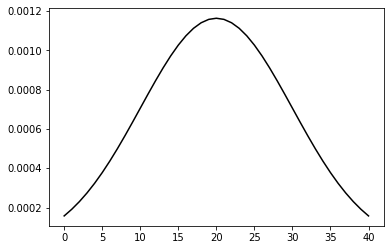

In [ ]:
plt.figure()
plt.plot(pdf_3d[0,:,0,0],'k')
#plt.plot(x_rand,pdf[:,0,0])
np.sum(pdf_3d[0,:])

In [ ]:
# using normally distributed initial data for probabilistic forecast 
xx = np.arange(-2,2.1,0.1)
yy = np.arange(-2,2.1,0.1)
zz = np.arange(-2,2.1,0.1)
n_steps     = 5000
pdf_3d      = np.zeros((n_steps,np.size(xx),np.size(xx),np.size(xx)))
pdf_3d[0,:] = PDF_3D(xx,yy,zz,0,1)
xs          = np.zeros((n_steps,np.size(xx)))
ys          = np.zeros((n_steps,np.size(xx)))
zs          = np.zeros((n_steps,np.size(xx)))
xs[0,:]     = xx
ys[0,:]     = yy
zs[0,:]     = zz
#pdf_3d = pdf_3d
for i in range(n_steps-1):
    print(i)
    xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR63(xs=xs[i,:],ys=ys[i,:],zs=zs[i,:],rho_xyz=pdf_3d[i,:],n_step=1,lrz_dt=0.01)
    #xs[i+1,:],ys[i+1,:],zs[i+1,:], pdf_3d[i+1,:] =LE_method_LR84(xs=xs[0,:],ys=ys[0,:],zs=zs[0,:],rho_xyz=pdf_3d[0,:],n_step=i,lrz_dt=0.0001)
    #xs,ys,zs, pdf_3d_t2 =LE_method_LR63(xs=xx,ys=yy,zs=zz,rho_xyz=pdf_3d,n_step=6,t_size=1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

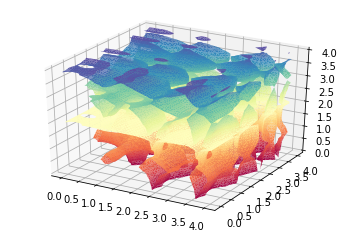

In [ ]:
t = 200
from numpy import array
from scipy.interpolate import RegularGridInterpolator as rgi
sort_index_x    = np.argsort(xs[t,:])
xs_template     = xs[t,sort_index_x]
sort_index_y    = np.argsort(ys[t,:])
ys_template     = ys[t,sort_index_y]
sort_index_z    = np.argsort(zs[t,:])
zs_template     = zs[t,sort_index_z]

xx,yy,zz = np.meshgrid(xs_template, ys_template, zs_template)
# ellipsoid
values = pdf_3d[0,:,:,:]

for i in range(np.shape(xs)[1]):
    for j in range(np.shape(ys)[1]):
        for k in range(np.shape(zs)[1]):
            #values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] =  (xs[0,i]**2+ys[0,j]**2+zs[0,k]**2)*(0.5)
            values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] = pdf_3d[t,i,j,k]

values_50 = np.percentile(values.flatten(),50)

import numpy as np
from numpy import sin, cos, pi
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#def fun(x, y, z):
#    return cos(x) + cos(y) + cos(z)

#x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
#vol = fun(x, y, z)
iso_val=0.0
verts, faces, _, _ = measure.marching_cubes(values, values_50, spacing=(0.1, 0.1, 0.1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()

#np.shape(vol)


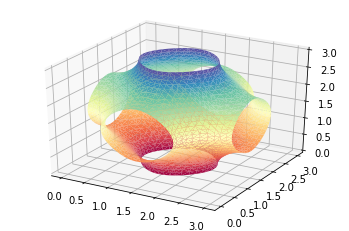

(31, 31, 31)

In [ ]:
import numpy as np
from numpy import sin, cos, pi
from skimage import measure
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def fun(x, y, z):
    return cos(x) + cos(y) + cos(z)

x, y, z = pi*np.mgrid[-1:1:31j, -1:1:31j, -1:1:31j]
vol = fun(x, y, z)
iso_val=0.0
verts, faces, _, _ = measure.marching_cubes(vol, iso_val, spacing=(0.1, 0.1, 0.1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(verts[:, 0], verts[:,1], faces, verts[:, 2],
                cmap='Spectral', lw=1)
plt.show()

np.shape(vol)

In [ ]:
np.shape(vol)

(31, 31, 31)

In [ ]:
X, Y, Z = np.mgrid[np.min(xs_template):np.max(xs_template):40j, \
                   np.min(ys_template):np.max(ys_template):40j, \
                   np.min(zs_template):np.max(zs_template):40j]
np.shape(X)

(40, 40, 40)

In [ ]:
#[np.min(xs_template):np.max(xs_template):40j]
np.linspace(np.min(xs_template),np.max(xs_template),40,endpoint=False)

array([-4.2229403 , -4.01971155, -3.81648279, -3.61325403, -3.41002528,
       -3.20679652, -3.00356777, -2.80033901, -2.59711025, -2.3938815 ,
       -2.19065274, -1.98742398, -1.78419523, -1.58096647, -1.37773772,
       -1.17450896, -0.9712802 , -0.76805145, -0.56482269, -0.36159394,
       -0.15836518,  0.04486358,  0.24809233,  0.45132109,  0.65454985,
        0.8577786 ,  1.06100736,  1.26423611,  1.46746487,  1.67069363,
        1.87392238,  2.07715114,  2.28037989,  2.48360865,  2.68683741,
        2.89006616,  3.09329492,  3.29652368,  3.49975243,  3.70298119])

In [ ]:
import plotly.graph_objects as go
import numpy as np



x_coordinate = np.linspace(np.min(xs_template),np.max(xs_template),40,endpoint=False)
y_coordinate = np.linspace(np.min(ys_template),np.max(ys_template),40,endpoint=False)
z_coordinate = np.linspace(np.min(zs_template),np.max(zs_template),40,endpoint=False) 


X, Y, Z = np.mgrid[np.min(x_coordinate):np.max(x_coordinate):40j, \
                   np.min(y_coordinate):np.max(y_coordinate):40j, \
                   np.min(z_coordinate):np.max(z_coordinate):40j]

Vi = my_interpolating_function(array([X,Y,Z]).T)

Vi_30 = np.percentile(Vi.flatten(),30)
Vi_95 = np.percentile(Vi.flatten(),95)

fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    Vi=Vi.flatten(),
    isomin=Vi_30,
    isomax=Vi_95,
    #surface=dict(count=3, fill=0.7, pattern='odd'),
    showscale=False, # remove colorbar
    caps=dict(x_show=True, y_show=True),
    ))

fig.update_layout(
    margin=dict(t=0, l=0, b=0), # tight layout
    scene_camera_eye=dict(x=1.86, y=0.61, z=0.98))
fig.show()

ValueError: ignored

In [ ]:
np.shape(Vi)

(40, 40, 40)

In [ ]:
import plotly.graph_objects as go
import numpy as np

X, Y, Z = np.mgrid[-5:5:40j, -5:5:40j, 0:5:20j]

values = X * X * 0.5 + Y * Y + Z * Z * 2

fig = go.Figure(data=go.Isosurface(
    x=X.flatten(),
    y=Y.flatten(),
    z=Z.flatten(),
    value=values.flatten(),
    isomin=30,
    isomax=50,
    surface=dict(count=3, fill=0.7, pattern='odd'),
    showscale=False, # remove colorbar
    caps=dict(x_show=True, y_show=True),
    ))

fig.update_layout(
    margin=dict(t=0, l=0, b=0), # tight layout
    scene_camera_eye=dict(x=1.86, y=0.61, z=0.98))
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
np.shape(Vi)

(40, 40, 40)

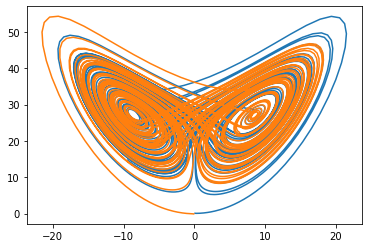

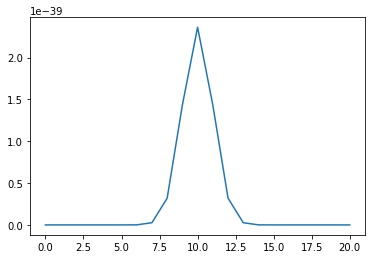

In [ ]:
plt.figure()
plt.plot(xs[:,20],zs[:,20])
plt.plot(xs[:,2],zs[:,2])

plt.figure()
plt.plot(pdf_3d[0,:,0,0])
#plt.plot(pdf_3d[20,:,0,0])
#plt.plot(pdf_3d[2000,:,0,0])
#xs = xs/np.std(xs[0:40,:])
#ys = ys/np.std(ys)
#zs = zs/np.std(zs)
#plt.plot(xs[:,1])
#plt.plot(xs[:,2])
#plt.plot(xs[:,4])
#plt.plot(xs[:,5])
#plt.plot(xs[:,6])
#plt.plot(xs[:,7])


In [ ]:
# test 3D confidence interval 


t= 2000

sort_index_x    = np.argsort(xs[t,:])
xs_template     = xs[t,sort_index_x]
sort_index_y    = np.argsort(ys[t,:])
ys_template     = ys[t,sort_index_y]
sort_index_z    = np.argsort(zs[t,:])
zs_template     = zs[t,sort_index_z]


xx,yy,zz = np.meshgrid(xs_template, ys_template, zs_template)
# ellipsoid
values = pdf_3d[0,:,:,:]

for i in range(np.shape(xs)[1]):
    for j in range(np.shape(ys)[1]):
        for k in range(np.shape(zs)[1]):
            #values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] =  (xs[0,i]**2+ys[0,j]**2+zs[0,k]**2)*(0.5)
            values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] = pdf_3d[t,i,j,k]


iso_surface_mark = np.zeros(np.shape(values))

# find the range in x-axis
for j in range(np.shape(ys)[1]):
    for k in range(np.shape(zs)[1]):
        for i in range(np.shape(xs)[1]):
            if (np.sum(values[i:,j,k])/(np.sum(values[:,j,k])*0.975) < 1) :
               #print(i)
               iso_surface_mark[i:,j,k]   = 1
               break
            else:
               iso_surface_mark[i,j,k] = 0
        for i in range(np.shape(xs)[1],0,-1):
            if (np.sum(values[i:,j,k])/(np.sum(values[:,j,k])*0.025) < 1) :
               iso_surface_mark[i-1,j,k] = 0
            else:
               break
# find the range in y-axis
#for i in range(np.shape(xs)[1]):
#    for k in range(np.shape(zs)[1]):
#        for j in range(np.shape(ys)[1]):
#            if ((np.sum(values[i,:j,k])/np.sum(values[i,:,k])*0.025) > 1) & ((np.sum(values[i,::-1,k][:j])/np.sum(values[i,:,k])*0.025)>1)
#               iso_surface_mark[i,j,k] = 1
#            else:
#               iso_surface_mark[i,j,k] = 0    

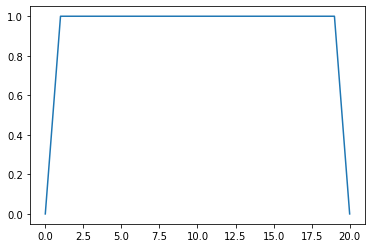

In [ ]:
plt.plot(iso_surface_mark[:,2,2])

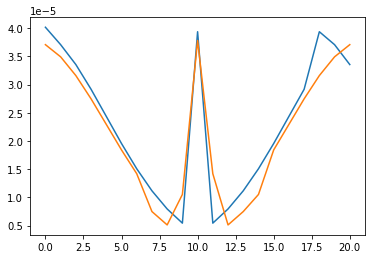

In [ ]:
plt.plot(values[0,:,0])
plt.plot(values[:,15,20])
#plt.plot(pdf_3d[t,:,0,0])

In [ ]:
i=2
a=[1,2,3,4,6]
a[i:-i]

[]

In [ ]:
np.shape(xs)[1]/2+1

10.5

In [ ]:
import plotly.graph_objects as go
import numpy as np

#X, Y, Z 0= np.mgrid[-5:5:40j, -5:5:40j, -5:5:40j]
t= 0

sort_index_x    = np.argsort(xs[t,:])
xs_template     = xs[t,sort_index_x]
sort_index_y    = np.argsort(ys[t,:])
ys_template     = ys[t,sort_index_y]
sort_index_z    = np.argsort(zs[t,:])
zs_template     = zs[t,sort_index_z]


xx,yy,zz = np.meshgrid(xs_template, ys_template, zs_template)
# ellipsoid
values = pdf_3d[0,:,:,:]

for i in range(np.shape(xs)[1]):
    for j in range(np.shape(ys)[1]):
        for k in range(np.shape(zs)[1]):
            #values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] =  (xs[0,i]**2+ys[0,j]**2+zs[0,k]**2)*(0.5)
            values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] = pdf_3d[t,i,j,k]
#values = (xs[0,:]**2+ys[0,:]**2+zs[0,:]**2)

iso_surface_mark = np.zeros(np.shape(values))

# find the range in x-axis
for j in range(np.shape(ys)[1]):
    for k in range(np.shape(zs)[1]):
        for i in range(np.shape(xs)[1]):
            if (np.sum(values[i:,j,k])/(np.sum(values[:,j,k])*0.975) < 1) :
               #print(i)
               iso_surface_mark[i:,j,k]   = 1
               break
            else:
               iso_surface_mark[i,j,k] = 0
        for i in range(np.shape(xs)[1],0,-1):
            if (np.sum(values[i:,j,k])/(np.sum(values[:,j,k])*0.025) < 1) :
               iso_surface_mark[i-1,j,k] = 0
            else:
               break


dim             = np.shape(values)
ped_template    = np.reshape(values[:,:,:],[dim[0]*dim[0]*dim[0],1])

ped_5           = np.percentile(ped_template,5)
ped_99          = np.percentile(ped_template,30)
ped_0           = np.min(ped_template)
ped_0           = np.max(ped_template)
#print(ped_30)
fig = go.Figure(data=go.Isosurface(
    x=xx.flatten(),
    y=yy.flatten(),
    z=zz.flatten(),
    value=values.flatten(),
    opacity=0.4,
    isomin=ped_5,
    isomax=ped_99,
    surface_count=1,
    caps=dict(x_show=False, y_show=False,z_show=False)
    ))
#plt.xlim([-2,-2])
#fig.update_layout(xaxis=dict(range=[-4,4]))
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
fig.show()

In [ ]:
np.shape(iso_surface_mark)

(21, 21, 21)

In [ ]:
import plotly.graph_objects as go
import numpy as np

#X, Y, Z 0= np.mgrid[-5:5:40j, -5:5:40j, -5:5:40j]
t= 2000

sort_index_x    = np.argsort(xs[t,:])
xs_template     = xs[t,sort_index_x]
sort_index_y    = np.argsort(ys[t,:])
ys_template     = ys[t,sort_index_y]
sort_index_z    = np.argsort(zs[t,:])
zs_template     = zs[t,sort_index_z]


xlim = np.percentile(xs_template,95)-np.percentile(xs_template,5)
xmean = np.percentile(xs_template,50)
ylim = np.percentile(ys_template,95)-np.percentile(ys_template,5)
ymean = np.percentile(ys_template,50)
zlim = np.percentile(zs_template,95)-np.percentile(zs_template,5)
zmean = np.percentile(zs_template,50)

xx,yy,zz = np.meshgrid(xs_template, ys_template, zs_template)
# ellipsoid
values = pdf_3d[0,:,:,:]

for i in range(np.shape(xs)[1]):
    for j in range(np.shape(ys)[1]):
        for k in range(np.shape(zs)[1]):
            #values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] =  ((xs[0,i]-20)**2+(ys[0,j]+10)**2+zs[0,k]**2)*(0.5)
            values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] = pdf_3d[t,i,j,k]
#values = (xs[0,:]**2+ys[0,:]**2+zs[0,:]**2)

dim             = np.shape(values)
ped_template    = np.reshape(values[:,:,:],[dim[0]*dim[0]*dim[0],1])

ped_5           = np.percentile(ped_template,5)
ped_99          = np.percentile(ped_template,99)
ped_0           = np.min(ped_template)
ped_0           = np.max(ped_template)

import plotly.graph_objects as go
import numpy as np

# Helix equation
#t = np.linspace(0, 20, 100)
#x, y, z = np.cos(t), np.sin(t), t

fig = go.Figure(data=[go.Scatter3d(
    x=xx.flatten(),
    y=yy.flatten(),
    z=zz.flatten(),
    mode='markers',
    marker=dict(
        size=values*1000,
        #color=,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.1
    )
)])

fig.update_layout(
        scene = dict(
        xaxis = dict(nticks=4, range=[xmean-xlim*3,xmean+xlim*3],),
        yaxis = dict(nticks=4, range=[ymean-xlim*3,ymean+xlim*3],),
        zaxis = dict(nticks=4, range=[zmean-xlim*3,zmean+xlim*3],),),
        width=700,
        margin=dict(r=10, l=10, b=10, t=10),scene_aspectmode='cube')

# tight layout
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


In [ ]:
import plotly.graph_objects as go
import numpy as np

#X, Y, Z 0= np.mgrid[-5:5:40j, -5:5:40j, -5:5:40j]
t               =10
for t in range(200,201):
    sort_index_x    = np.argsort(xs[t,:])
    xs_template     = xs[t,sort_index_x]
    sort_index_y    = np.argsort(ys[t,:])
    ys_template     = ys[t,sort_index_y]
    sort_index_z    = np.argsort(zs[t,:])
    zs_template     = zs[t,sort_index_z]
    


    xlim = np.percentile(xs_template,95)-np.percentile(xs_template,5)
    xmean = np.percentile(xs_template,50)
    ylim = np.percentile(ys_template,95)-np.percentile(ys_template,5)
    ymean = np.percentile(ys_template,50)
    zlim = np.percentile(zs_template,95)-np.percentile(zs_template,5)
    zmean = np.percentile(zs_template,50)

    xx,yy,zz = np.meshgrid(xs_template, ys_template, zs_template)
    values   = np.zeros((np.shape(xs)[1],np.shape(xs)[1],np.shape(xs)[1]))
    for i in range(np.shape(xs)[1]):
       for j in range(np.shape(ys)[1]):
            for k in range(np.shape(zs)[1]):
                #values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] =  ((xs[0,i])**2+(ys[0,j])**2+zs[0,k]**2)*(0.5)
                values[sort_index_x[i],sort_index_y[j],sort_index_z[k]] = pdf_3d[t,i,j,k]

    # ellipsoid
    #values          = pdf_3d[t,:,:,:]
    dim             = np.shape(values)
    ped_template    = np.reshape(values[:,:,:],[dim[0]*dim[0]*dim[0],1])

    ped_45          = np.percentile(ped_template,50)
    ped_55          = np.percentile(ped_template,90)
    ped_0           = np.min(ped_template)
    ped_max         = np.max(ped_template)


#ped_5_upper     = np.percentile(ped_template,55)
#loc1,loc2,loc3  = np.where((pdf_3d[t,:,:,:]>=ped_5_lower) & (pdf_3d[t,:,:,:]<=ped_5_upper))



#ped_50          = np.percentile(ped_template,25)
#loc1,loc2,loc3  = np.where((pdf_3d[t,:,:,:]>=ped_5_lower) & (pdf_3d[t,:,:,:]<=ped_5_upper))


    fig = go.Figure(data=go.Isosurface(
        x=xx.flatten(),
        y=yy.flatten(),
        z=zz.flatten(),
        value=values.flatten(),
        opacity=0.4,
        isomin=ped_45,
        isomax=ped_55,
        surface_count=10,
        #yaxis=dict(range=[-4,4]),
        caps=dict(x_show=False, y_show=False,z_show=False)
        ))
#plt.xlim([-2,-2])
#fig.update_layout(xaxis=dict(range=[-4,4]))
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
#fig.update_layout(ranges=[-4,4])
#fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines'), layout_yaxis_range=[-4,4])
#fig.update(layout_yaxis_range = [-4,4])
    fig.update_layout(
        scene = dict(
        xaxis = dict(nticks=4, range=[xmean-xlim*2,xmean+xlim*2],),
        yaxis = dict(nticks=4, range=[ymean-ylim*2,ymean+ylim*2],),
        zaxis = dict(nticks=4, range=[zmean-zlim*2,zmean+zlim*2],),),
        width=700,
        margin=dict(r=10, l=10, b=10, t=10),scene_aspectmode='cube')

    fig.show()
    #fig.write_image("/content/drive/MyDrive/website-hugo/chaos_and_predictability/week6/Figure/fig_t="+str(t).zfill(2)+".png")

In [ ]:
ped_55

241.23456790123458

In [ ]:
xx = np.arange(-4,4.1,0.1)
yy = xx
zz = xx
pdf_3d_xyz = PDF_3D(xx,yy,zz,0,1)
pdf_3d_yz = np.trapz(pdf_3d_xyz,xx,axis=0)
pdf_3d_z  = np.trapz(pdf_3d_yz,yy,axis=0)
pdf_3d    = np.trapz(pdf_3d_z,yy,axis=0)
print(pdf_3d)

0.99980731410929


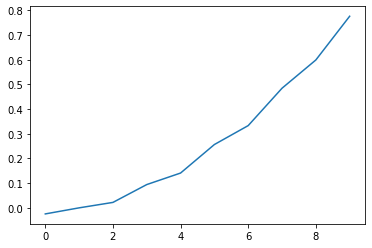

In [ ]:
plt.figure()
plt.plot(zs_template[0:10])

#print(sort_index)

In [ ]:
# define the function for Lorenz 84 system


def lorenz84(steps, lrz_s=10, lrz_r=28, lrz_b=8/3, lrz_dt = 0.001, ensemble=10):
    if ensemble>1:
        xs = np.empty((1,ensemble))
        ys = np.empty((1,ensemble))
        zs = np.empty((1,ensemble))

        x_prime = np.zeros((steps + 1,ensemble))
        y_prime = np.zeros((steps + 1,ensemble))
        z_prime = np.zeros((steps + 1,ensemble))
        #print(np.shape(x_prime))
        #print(np.shape(xs[1,:]))
        xs[0,:], ys[0,:], zs[0,:] = 0.5, 0.5,0.5
        x_prime[0,:], y_prime[0,:], z_prime[0,:] = np.random.normal(0, 0.01, ensemble), np.random.normal(0, 0.01, ensemble),np.random.normal(0, 0.01, ensemble)
        #print(np.shape(xs[1,:]))
        for i in range(steps):   
            x_dot = -lrz_s*x_prime[i,:] +lrz_s*y_prime[i,:] 
            y_dot = -x_prime[i,:]*zs -z_prime[i,:]*xs + lrz_r*x_prime[i,:] - y_prime[i,:]
            z_dot = x_prime[i,:]*ys + y_prime[i,:]*xs - lrz_b*z_prime[i,:]

            x_prime[i + 1,:] = x_prime[i,:] + x_dot*lrz_dt
            y_prime[i + 1,:] = y_prime[i,:] + y_dot*lrz_dt
            z_prime[i + 1,:] = z_prime[i,:] + z_dot*lrz_dt
                #print(np.shape(x_dot))
                #print(np.shape(xs[i,:]))
                #print(np.shape(x_prime))
            #print(np.shape(xs[i,:]))
            #xs[i + 1,:] = xs[i,:] + x_prime*0.1
            #ys[i + 1,:] = ys[i,:] + y_prime*0.1
            #zs[i + 1,:] = zs[i,:] + z_prime*0.1
           
    else:
        xs = np.empty((steps + 1,))
        ys = np.empty((steps + 1,))
        zs = np.empty((steps + 1,))
        
        xs[0,], ys[0,], zs[0,] = 1, 1,1

        for i in range(steps):
            x_dot = lrz_s*(ys[i] - xs[i])
            y_dot = lrz_r*xs[i] - ys[i] - xs[i]*zs[i]
            z_dot = xs[i]*ys[i] - lrz_b*zs[i]
            xs[i + 1] = xs[i] + (x_dot * lrz_dt)
            ys[i + 1] = ys[i] + (y_dot * lrz_dt)
            zs[i + 1] = zs[i] + (z_dot * lrz_dt)
    return x_prime+xs, y_prime+ys, z_prime+zs 

(10001, 10)

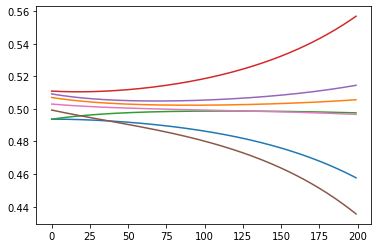

In [ ]:
#del xs, ys, zs
xs, ys, zs = lorenz84(10000)
plt.figure()
plt.plot(xs[0:200,0])
plt.plot(xs[0:200,1])
plt.plot(xs[0:200,3])
plt.plot(xs[0:200,4])
plt.plot(xs[0:200,5])
plt.plot(xs[0:200,6])
plt.plot(xs[0:200,7])

np.shape(xs)

In [ ]:
np.shape(xs)

(5001, 10)